# CV Lab 5: Image Registration

Name: Pranay Gupta

PRN: 1032211057

Batch: A4

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Target')

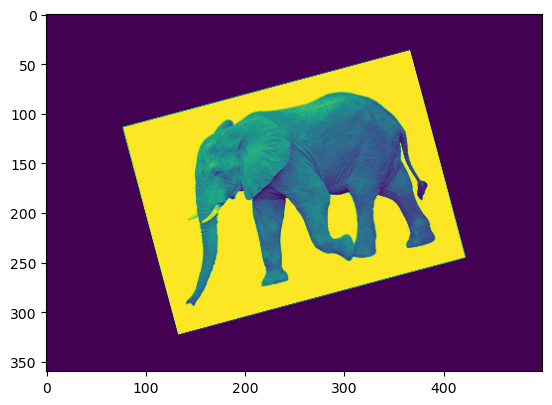

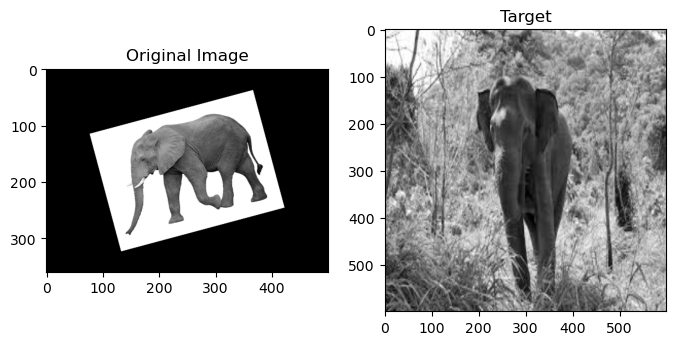

In [2]:
img1 = cv2.imread('elephant.png',0)
#img1 = cv2.resize(img1, (500,750))
rows,cols= img1.shape
img_rotated = cv2.warpAffine(img1, cv2.getRotationMatrix2D((cols/2, rows/2), 15, 0.6),(cols, rows))
plt.imshow(img_rotated)

img2 = cv2.imread('jungle.png',0)
img2 = cv2.resize(img2, (600,600))

figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img_rotated, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(img2, cmap='gray')
ax[1].set_title("Target")

Descriptors:
 [[30.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 45. 70.  0.]
 [ 0.  0.  0. ... 48. 33.  0.]
 ...
 [24.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 20.  0.  0.]
 [13.  0.  0. ...  0.  0.  0.]]


Text(0.5, 1.0, 'Keypoints')

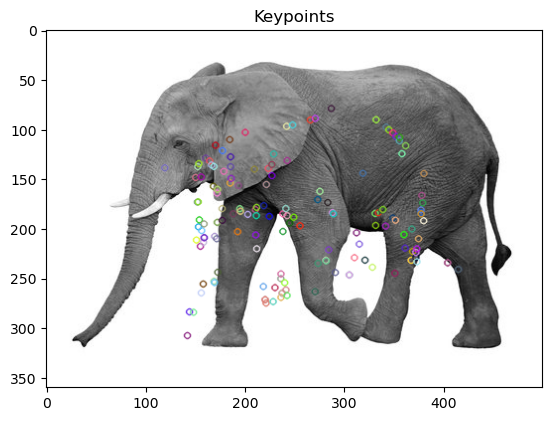

In [3]:
#keypoints
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img_rotated,None)
img_1 = img_rotated.copy()
img_1 = cv2.drawKeypoints(img1,keypoints_1,img_1)
print("Descriptors:\n",descriptors_1)
plt.imshow(img_1)
plt.title("Keypoints")

In [4]:
#ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img_rotated, None)
kp2, des2 = orb.detectAndCompute(img2, None)

len(kp1), len(kp2)

(500, 500)

Text(0.5, 1.0, 'Feature Matching using ORB')

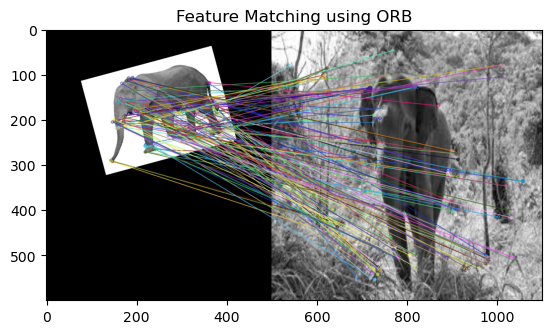

In [5]:
#Matching the keypoints (features)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

#Picking the top 1500 matches
img3 = cv2.drawMatches(img_rotated, kp1, img2, kp2, matches[:1500], img2, flags=2)
plt.imshow(img3)
plt.title("Feature Matching using ORB")

In [6]:

#Finding homography transform
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 25.0)
print("Homography Transform:\n",M)

Homography Transform:
 [[-1.52380432e+00  4.42438305e-01  5.09879308e+02]
 [-1.61167507e+00  7.44965353e-01  5.00089763e+02]
 [-3.08732262e-03  1.23732071e-03  1.00000000e+00]]


Text(0.5, 1.0, 'Aligned Image')

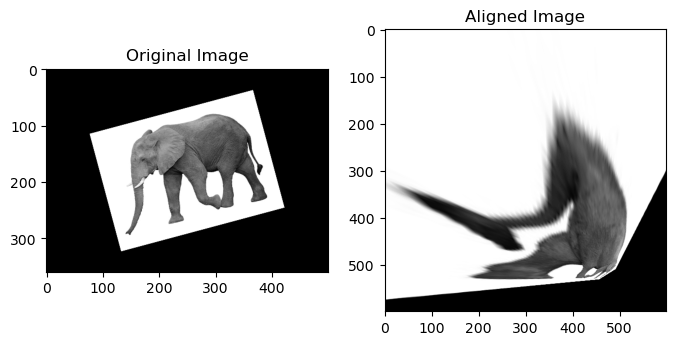

In [7]:
#Applying transform to 1st image
aligned_img = cv2.warpPerspective(img_rotated, M, (img2.shape[1], img2.shape[0]))

figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img_rotated, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(aligned_img, cmap='gray')
ax[1].set_title("Aligned Image")

In [8]:

#SIFT (Scale Invarient Feature Transform)
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)


(338, 6466)

Text(0.5, 1.0, 'Feature Matching using SIFT')

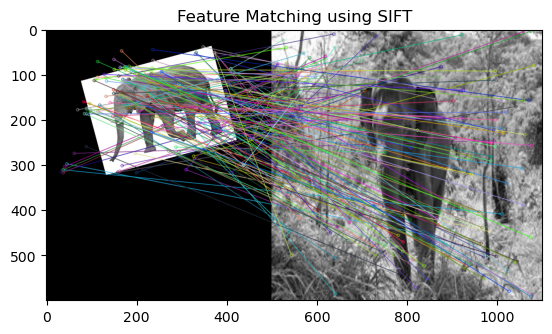

In [9]:
#Matching the keypoints (features)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img_rotated, keypoints_1, img2, keypoints_2, matches[:1500], img2, flags=2)
plt.imshow(img3)
plt.title("Feature Matching using SIFT")

In [10]:


#Finding homography transform
src_pts = np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
print("Homography Transform:\n",M)

Homography Transform:
 [[-1.12388453e+00 -2.44635003e-01  4.95274533e+02]
 [-4.76658144e-01 -3.62515967e-01  2.65889529e+02]
 [-2.16349600e-03 -6.79783923e-04  1.00000000e+00]]


Text(0.5, 1.0, 'Aligned Image')

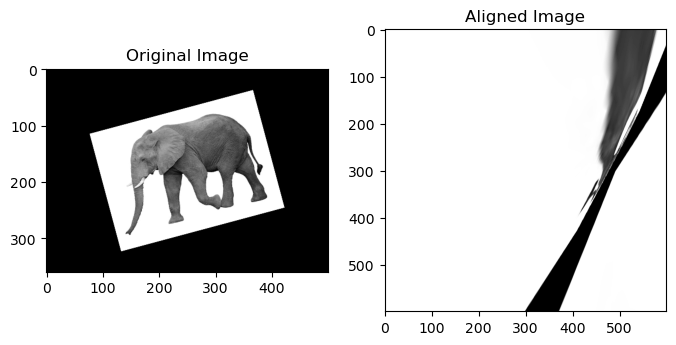

In [11]:
#Applying transform to 1st image
aligned_img = cv2.warpPerspective(img_rotated, M, (img2.shape[1], img2.shape[0]))
figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img_rotated, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(aligned_img, cmap='gray')
ax[1].set_title("Aligned Image")